In [1]:
# Looking at IVV & QQQ

# Both are large cap GROWTH equities

In [2]:
import pandas as pd
import calendar
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as pdr
from scipy import stats
%matplotlib notebook

In [3]:
# top 5 holdings comparision between Ishares Core (IVV) & Invesco QQQ Trust (QQQ)

# Alpahbet class A (GOOGL) & C  (GOOG) combined because the price variation is somewhat negligable..
# and the voting rights associated wtih GOOGL (that GOOG doesn't have) don't really factor into this analysis.

holdings = {"QQQ": [10.98, 9.64, 8.41,7.61, 3.91], "IVV" :[5.69, 5.27, 3.94,3.90, 2.17]}
holdings_df = pd.DataFrame(holdings, index = ["Apple", "Microsoft", "Amazon", "Alphabet", "Facebook"])
holdings_df

# QQQ seems much more tech leverged than IVV does

,QQQ,IVV
Apple,10.98,5.69
Microsoft,9.64,5.27
Amazon,8.41,3.94
Alphabet,7.61,3.90
Facebook,3.91,2.17


### IVV Data

In [4]:
# Ticker
ticker = "IVV"

# start date
start = dt.datetime(2015,1,1)

# end date
end = dt.date.today()

# pull it
IVV_df = pdr.get_data_yahoo(ticker, start, end)
IVV_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,208.320007,205.639999,207.839996,206.729996,3400900.0,182.605850
2015-01-05,205.789993,202.759995,205.619995,203.100006,9582600.0,179.399445
2015-01-06,204.119995,200.250000,203.509995,201.270004,8019900.0,177.783066
2015-01-07,204.139999,202.300003,202.839996,203.759995,3563300.0,179.982437
2015-01-08,207.589996,205.429993,205.449997,207.399994,4683200.0,183.197662


### QQQ Data 

In [5]:
# Ticker
tick = "QQQ"

# Start date
start = dt.datetime(2015,1,1)

# End date
end = dt.date.today()

# Pull it
QQQ_df = pdr.get_data_yahoo(tick, start, end)
QQQ_df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,104.199997,102.440002,103.760002,102.940002,31314600.0,97.436562
2015-01-05,102.610001,101.139999,102.489998,101.430000,36521300.0,96.007301
2015-01-06,101.750000,99.620003,101.580002,100.070000,66205500.0,94.720009
2015-01-07,101.599998,100.489998,100.730003,101.360001,37577400.0,95.941048
2015-01-08,103.500000,102.110001,102.220001,103.300003,40212600.0,97.777336


#### Add the Daily Change, Percent Change, and Normalization columns to both DataFrames

In [6]:
# IVV

# Daily change 
IVV_df["Daily_Change"] = IVV_df["Close"] - IVV_df["Open"]

# Percentage change (daily)
IVV_df["Percent_Change"] = (IVV_df["Close"] - IVV_df["Open"])/IVV_df["Open"]*100

# Normalized Change 
IVV_df["Normalized_Change"] = IVV_df["Close"]/ IVV_df["Close"].iloc[0]

In [7]:
# Checking the added columns

IVV_df.head(5)

,High,Low,Open,Close,Volume,Adj Close,Daily_Change,Percent_Change,Normalized_Change
Date,,,,,,,,,
2015-01-02,208.320007,205.639999,207.839996,206.729996,3400900.0,182.605850,-1.110001,-0.534065,1.000000
2015-01-05,205.789993,202.759995,205.619995,203.100006,9582600.0,179.399445,-2.519989,-1.225556,0.982441
2015-01-06,204.119995,200.250000,203.509995,201.270004,8019900.0,177.783066,-2.239990,-1.100678,0.973589
2015-01-07,204.139999,202.300003,202.839996,203.759995,3563300.0,179.982437,0.919998,0.453559,0.985633
2015-01-08,207.589996,205.429993,205.449997,207.399994,4683200.0,183.197662,1.949997,0.949135,1.003241


In [8]:
# QQQ

# Daily Change
QQQ_df["Daily_Change"] = QQQ_df["Close"] - QQQ_df["Open"]

# Percentage change (Daily)
QQQ_df["Percent_Change"] = (QQQ_df["Close"] - QQQ_df["Open"])/QQQ_df["Open"]*100

# Normalized Change
QQQ_df["Normalized_Change"] = QQQ_df["Close"]/ QQQ_df["Close"].iloc[0]

In [9]:
# Checking the added columns

QQQ_df.head(5)

,High,Low,Open,Close,Volume,Adj Close,Daily_Change,Percent_Change,Normalized_Change
Date,,,,,,,,,
2015-01-02,104.199997,102.440002,103.760002,102.940002,31314600.0,97.436562,-0.820000,-0.790285,1.000000
2015-01-05,102.610001,101.139999,102.489998,101.430000,36521300.0,96.007301,-1.059998,-1.034245,0.985331
2015-01-06,101.750000,99.620003,101.580002,100.070000,66205500.0,94.720009,-1.510002,-1.486515,0.972120
2015-01-07,101.599998,100.489998,100.730003,101.360001,37577400.0,95.941048,0.629997,0.625432,0.984651
2015-01-08,103.500000,102.110001,102.220001,103.300003,40212600.0,97.777336,1.080002,1.056546,1.003497


#### Compare closing prices of IVV vs. QQQ

In [10]:
# Create new DFs with a reset index in order to pull "Date" as a column
QQQ_df1 = QQQ_df.reset_index()
IVV_df1 = IVV_df.reset_index()

In [11]:
IVV_df["Adj Close"]

Date
2015-01-02    182.605850
2015-01-05    179.399445
2015-01-06    177.783066
2015-01-07    179.982437
2015-01-08    183.197662
                 ...    
2021-06-23    424.410004
2021-06-24    426.869995
2021-06-25    428.440002
2021-06-28    429.350006
2021-06-29    429.480011
Name: Adj Close, Length: 1634, dtype: float64

In [12]:
# Making a new DF with date as the index and close prices of the two ETFs as C0, C1

df_comp = pd.DataFrame(QQQ_df1["Date"])
df_comp["QQQ Adj Close"] = QQQ_df1["Adj Close"]
df_comp["IVV Adj Close"] = IVV_df1["Adj Close"]
df_comp.head(5)

,Date,QQQ Adj Close,IVV Adj Close
0,2015-01-02,97.436562,182.605850
1,2015-01-05,96.007301,179.399445
2,2015-01-06,94.720009,177.783066
3,2015-01-07,95.941048,179.982437
4,2015-01-08,97.777336,183.197662


#### Graphing the Adj Closes

<IPython.core.display.Javascript object>


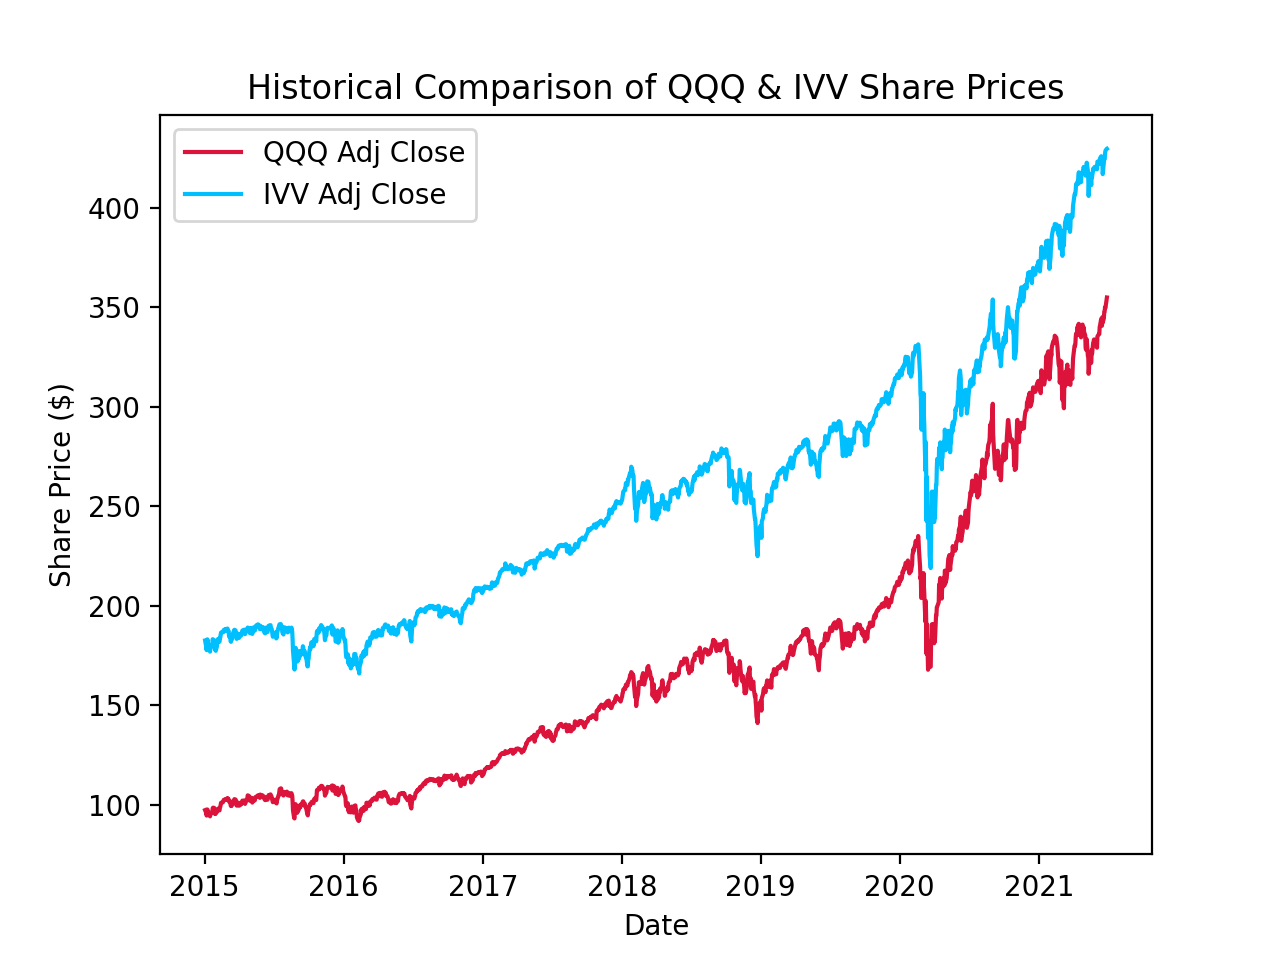

In [13]:
fig, ax = plt.subplots()
plt.plot(df_comp["Date"],df_comp["QQQ Adj Close"], "C0", color="crimson")
plt.plot(df_comp["Date"],df_comp["IVV Adj Close"], "C1", color="deepskyblue")
plt.ylabel("Share Price ($)")
plt.xlabel("Date")
plt.legend(["QQQ Adj Close", "IVV Adj Close"])
plt.title("Historical Comparison of QQQ & IVV Share Prices")
plt.show()

# save the fig

# plt.savefig("QQQ_IVV_Closes.png")

#### Create Moving Average (MA) w/ rolling 10 day avgs for both QQQ & IVV

In [14]:
QQQ_df["MA_10"] = QQQ_df["Close"].rolling(10).mean()

IVV_df["MA_10"] = IVV_df["Close"].rolling(10).mean()

#### Create Exponential Moving Average (EMA_10) w/ rolling 10 day avgs for QQQ & IVV

In [15]:
QQQ_df["EMA_10"] = QQQ_df["Close"].ewm(span=10, adjust=False).mean()

IVV_df["EMA_10"] = IVV_df["Close"].ewm(span=10, adjust=False).mean()

In [16]:
IVV_df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,Daily_Change,Percent_Change,Normalized_Change,MA_10,EMA_10
Date,,,,,,,,,,,
2021-06-23,425.859985,424.329987,424.970001,424.410004,2744100.0,424.410004,-0.559998,-0.131773,2.052968,423.298999,422.962855
2021-06-24,427.380005,426.440002,426.690002,426.869995,4817200.0,426.869995,0.179993,0.042183,2.064867,423.581998,423.673244
2021-06-25,428.910004,427.399994,427.760010,428.440002,4171500.0,428.440002,0.679993,0.158966,2.072462,423.951999,424.539927
2021-06-28,429.489990,427.720001,429.040009,429.350006,4014100.0,429.350006,0.309998,0.072254,2.076864,424.310999,425.414487
2021-06-29,430.379211,429.000000,429.760010,429.480011,2863712.0,429.480011,-0.279999,-0.065152,2.077492,424.766000,426.153673


#### Graphing the EMA v MA w/ Share price overlay 

<IPython.core.display.Javascript object>


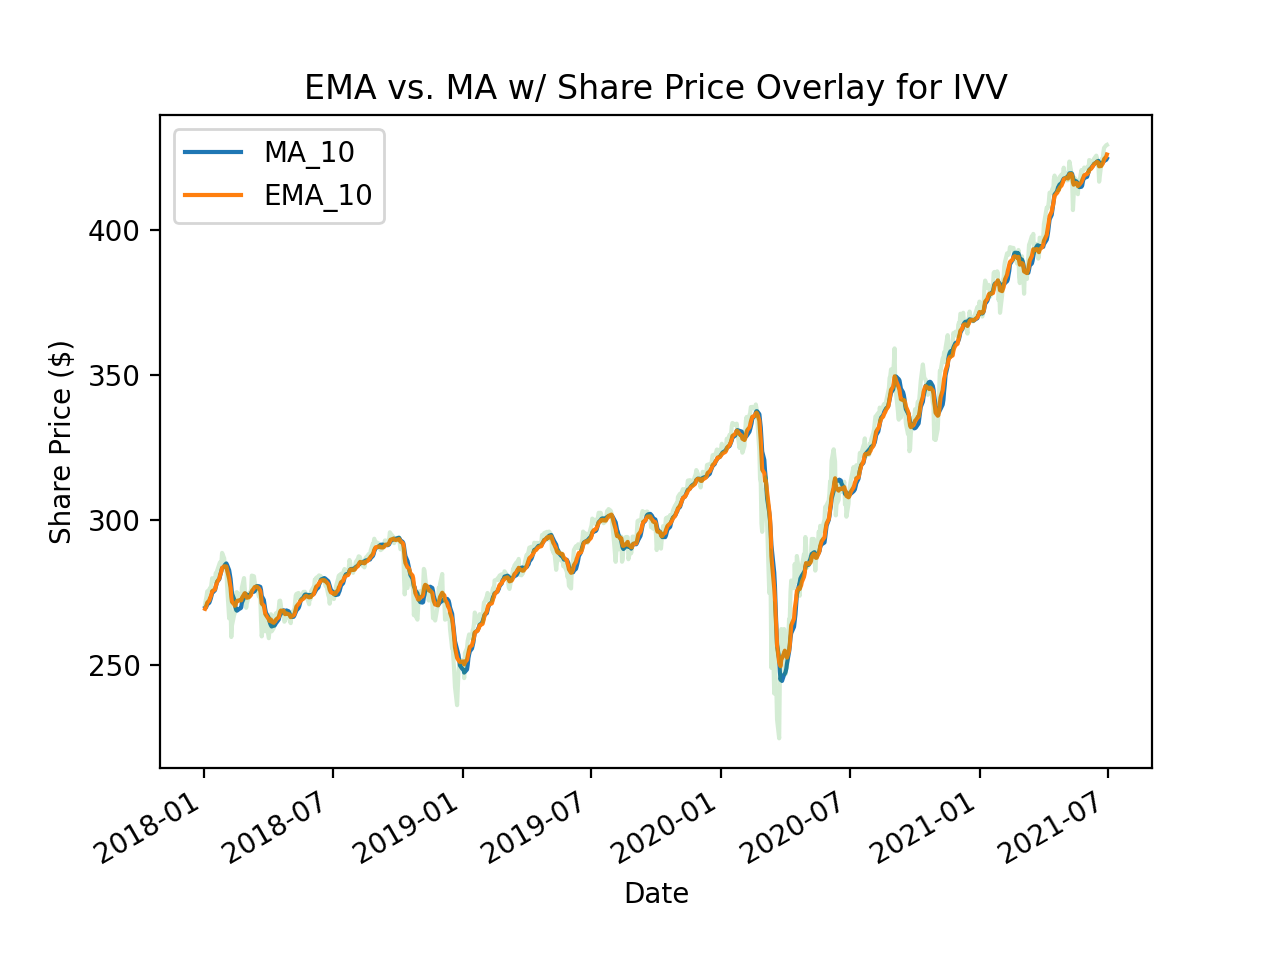

In [17]:
# IVV
# Going to only look at last 3 years of data in order to get a better look

fig, ax = plt.subplots()
IVV_df[["MA_10","EMA_10"]].loc["2018-01-01":].plot(ax=ax)
IVV_df["Close"].loc["2018-01-01":].plot(ax=ax, alpha =0.2)
plt.ylabel("Share Price ($)")
plt.xlabel("Date")
plt.title("EMA vs. MA w/ Share Price Overlay for IVV")
plt.show()

# save figure

# plt.savefig("EMA_MA_IVV.png")

<IPython.core.display.Javascript object>


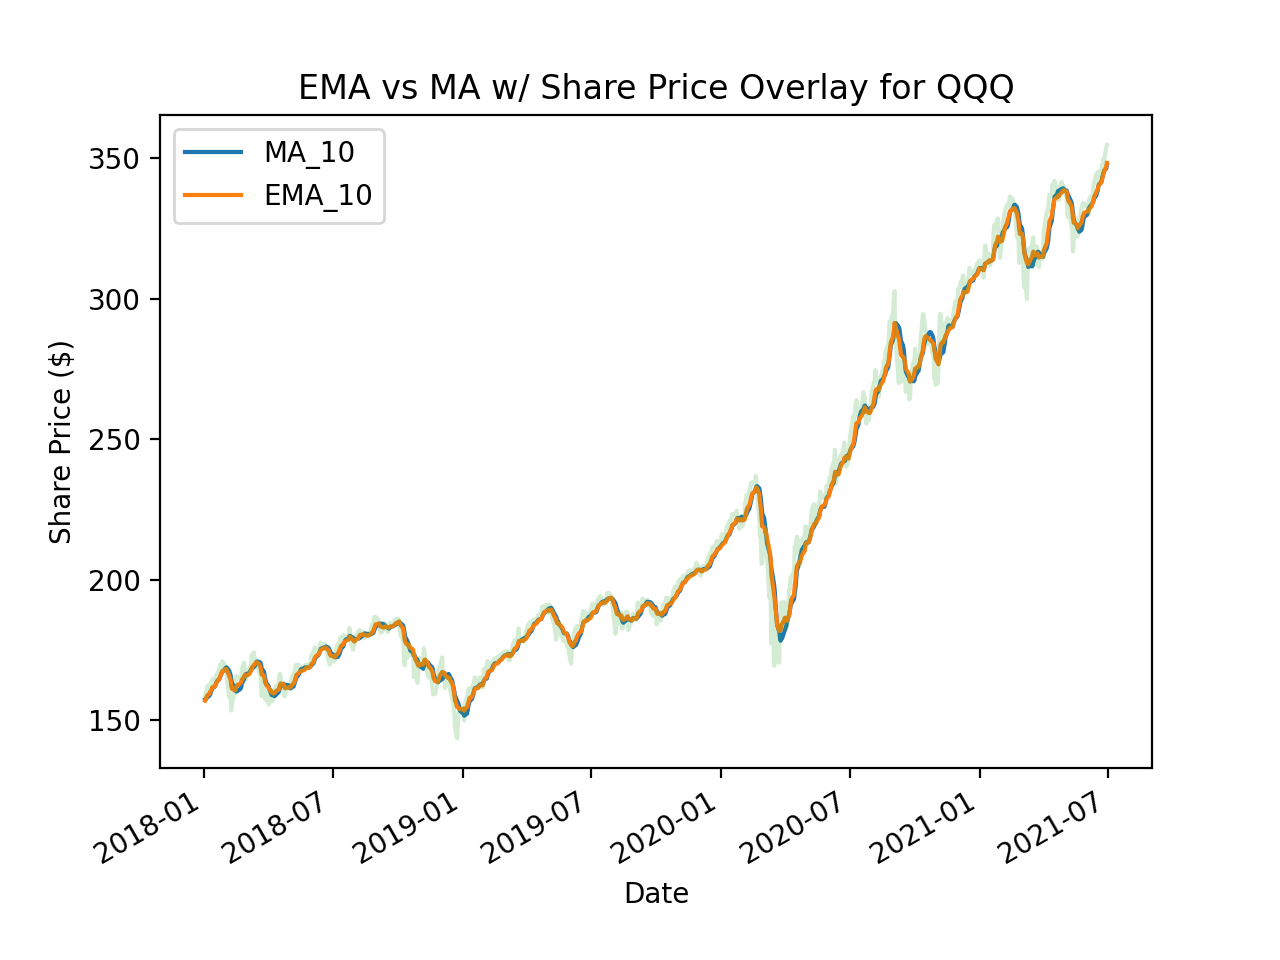

In [18]:
# QQQ
# Only going back to 2018 in order to get a closer look at the relationship between the share price & EMA/MA

fig, ax = plt.subplots()
QQQ_df[["MA_10", "EMA_10"]].loc["2018-01-01" :].plot(ax=ax)
QQQ_df["Close"].loc["2018-01-01" :].plot(ax=ax, alpha = 0.2)
plt.ylabel("Share Price ($)")
plt.xlabel("Date")
plt.title("EMA vs MA w/ Share Price Overlay for QQQ")

plt.show()

# save figure 

# plt.savefig("QQQ_EMA_MA.png")

<IPython.core.display.Javascript object>


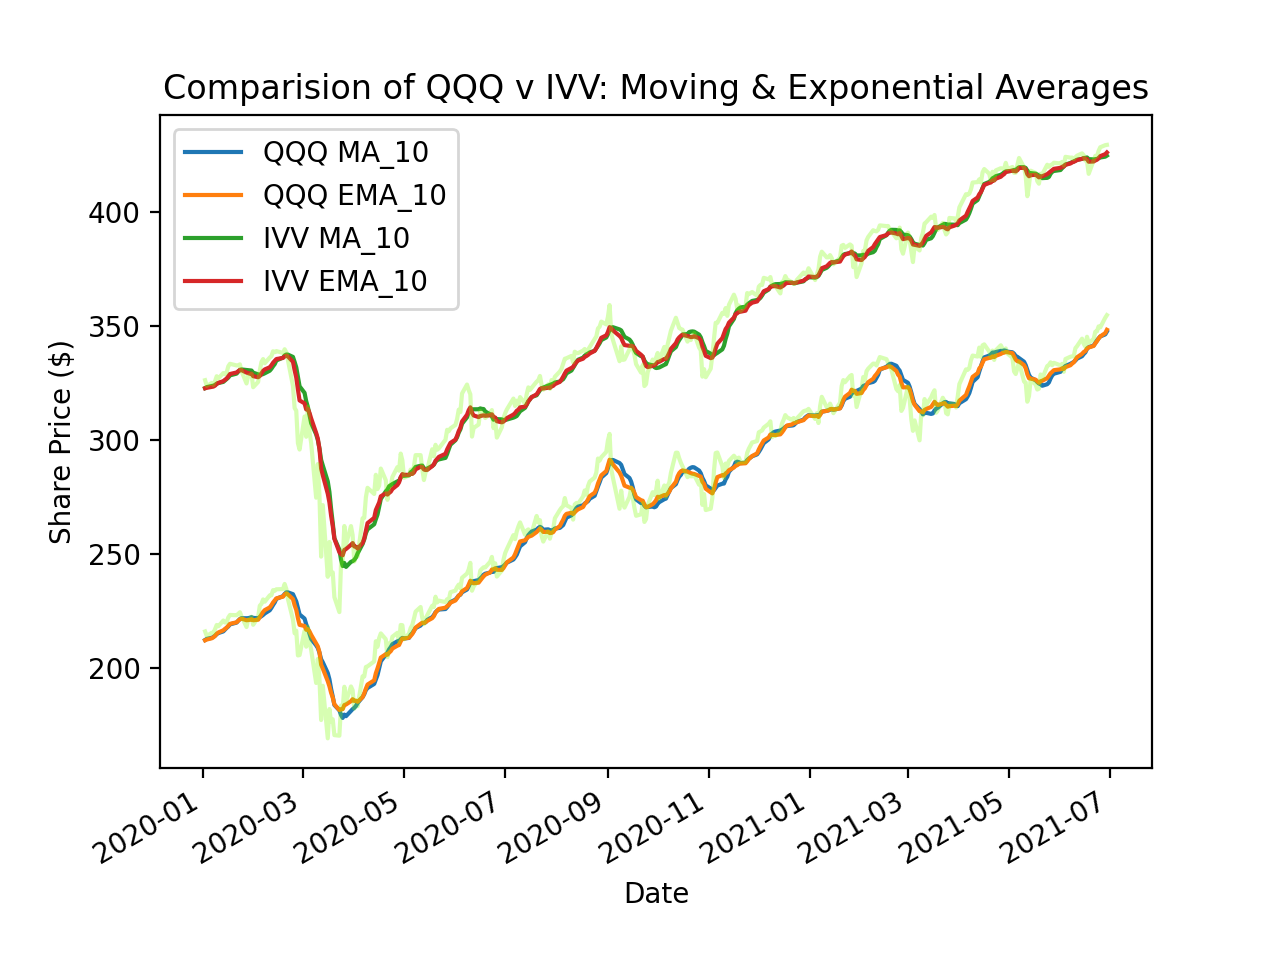

In [19]:
# plot the two ETFs together to compare 

fig, ax = plt.subplots()
QQQ_AVG = QQQ_df[["MA_10", "EMA_10"]].loc["2020-01-01" :].plot(ax=ax)
IVV_AVG = IVV_df[["MA_10","EMA_10"]].loc["2020-01-01":].plot(ax=ax)

QQQ_Closing = QQQ_df["Close"].loc["2020-01-01" :].plot(ax=ax, alpha = 0.3, color = "lawngreen")
IVV_Closing = IVV_df["Close"].loc["2020-01-01" :].plot(ax=ax, alpha = 0.3, color = "lawngreen")

plt.ylabel("Share Price ($)")
plt.xlabel("Date")
plt.title("Comparision of QQQ v IVV: Moving & Exponential Averages")
plt.legend(["QQQ MA_10", "QQQ EMA_10", "IVV MA_10", "IVV EMA_10"])

# save fig

# plt.savefig("QQQ_IVV_MA_EMA.png")

### MACD & Signal Lines for both ETFs

##### QQQ MACD & Signal Line

In [20]:
# QQQ MACD Calculations

# need EMA_1 (12 day period) & EMA_2 (26 day period)

exp1 = QQQ_df["Close"].ewm(span=12, adjust=False).mean()

exp2 = QQQ_df["Close"].ewm(span=26, adjust = False).mean()

In [21]:
# Get the MACD 

QQQ_df["MACD"] = exp1 - exp2

# Get the Signal Line from the MACD

QQQ_df["Signal_Line"] = QQQ_df["MACD"].ewm(span=9, adjust = False).mean()

# Check it
QQQ_df.tail(3)

,High,Low,Open,Close,Volume,Adj Close,Daily_Change,Percent_Change,Normalized_Change,MA_10,EMA_10,MACD,Signal_Line
Date,,,,,,,,,,,,,
2021-06-25,350.720001,348.839996,350.470001,349.459991,28627400.0,349.459991,-1.010010,-0.288187,3.394793,345.477002,345.483683,4.493562,3.689864
2021-06-28,353.850006,350.720001,350.779999,353.709991,38934900.0,353.709991,2.929993,0.835279,3.436079,346.397000,346.979376,4.886583,3.929208
2021-06-29,354.950012,352.670013,353.529999,354.829987,25478610.0,354.829987,1.299988,0.367716,3.446959,347.653998,348.406759,5.228162,4.188999


##### IVV MACD & Signal Line

In [22]:
# IVV MACD Calcs

# need EMA_1 (12 day rolling) & EMA_2 (26 day rolling)

exp1= IVV_df["Close"].ewm(span=12, adjust = False).mean()

exp2= IVV_df["Close"].ewm(span=26, adjust = False).mean()

In [23]:
# Get the IVV MACD 

IVV_df["MACD"] = exp1 - exp2

# Get the Signal Line from the MACD series

IVV_df["Signal_Line"] = IVV_df["MACD"].ewm(span=9, adjust = False).mean()

# check it
IVV_df.tail(3)

,High,Low,Open,Close,Volume,Adj Close,Daily_Change,Percent_Change,Normalized_Change,MA_10,EMA_10,MACD,Signal_Line
Date,,,,,,,,,,,,,
2021-06-25,428.910004,427.399994,427.760010,428.440002,4171500.0,428.440002,0.679993,0.158966,2.072462,423.951999,424.539927,1.980129,1.825549
2021-06-28,429.489990,427.720001,429.040009,429.350006,4014100.0,429.350006,0.309998,0.072254,2.076864,424.310999,425.414487,2.242457,1.908930
2021-06-29,430.379211,429.000000,429.760010,429.480011,2863712.0,429.480011,-0.279999,-0.065152,2.077492,424.766000,426.153673,2.432801,2.013705


In [24]:
# When the MACD is *ABOVE* the Signal line, it is a buy/hold indicator...
# When the MACD is *BELOW* the Signal line, it is a sell indictator

# BOTH MACD & Signal Line are LAGGING INDICTATORS 

### Graphing the MACD & Signal Lines for both ETFs

##### Graphing QQQ 

<IPython.core.display.Javascript object>


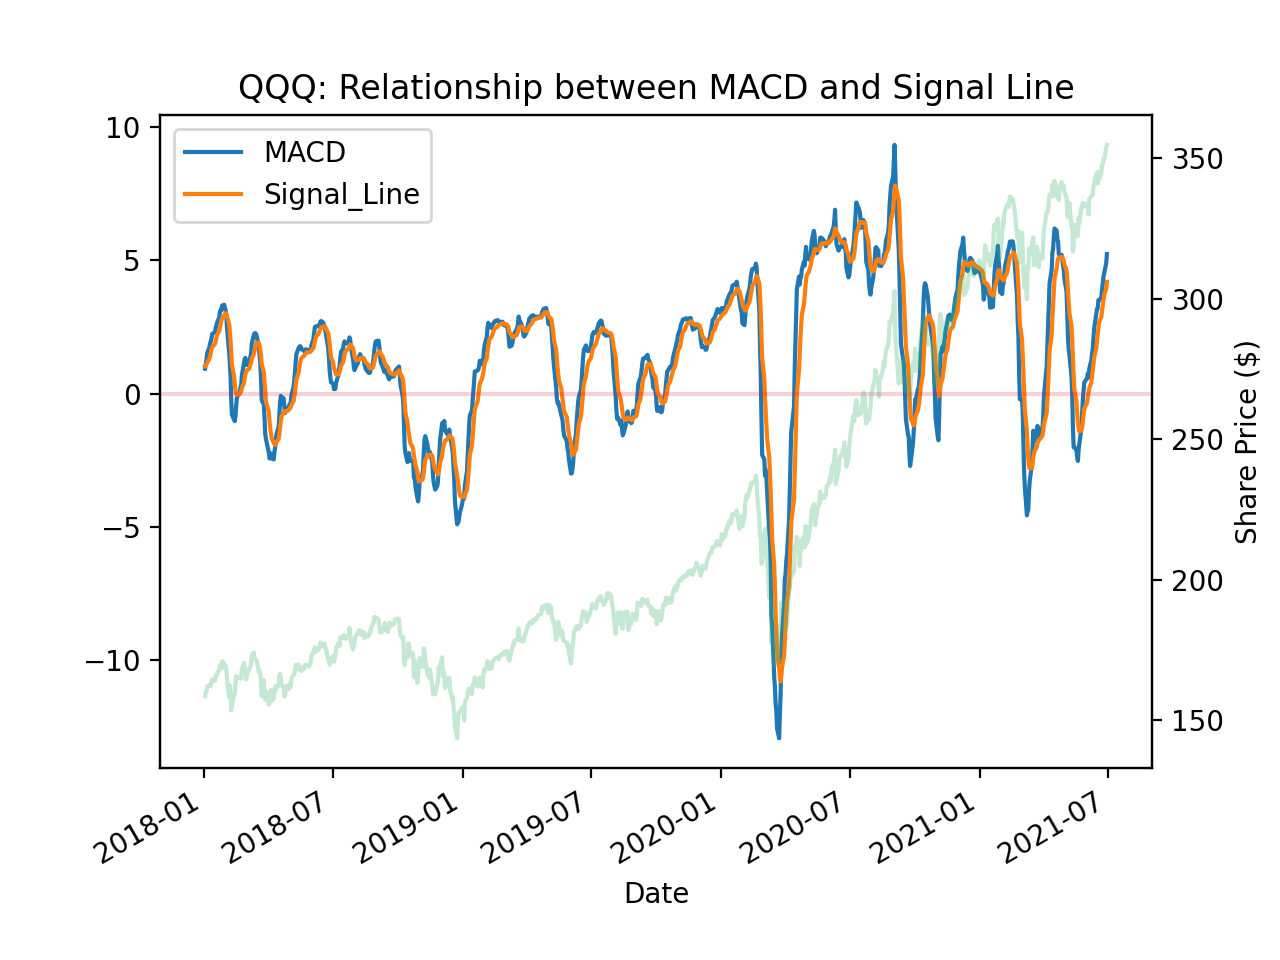

In [25]:
# MACD & Signal Line (2018-Present)

fig, ax = plt.subplots()
QQQ_df[["MACD", "Signal_Line"]].loc["2018-01-01" :].plot(ax=ax)
QQQ_df["Close"].loc["2018-01-01" :].plot(ax=ax, alpha =0.30, color = "mediumseagreen", secondary_y=True)
plt.xlabel("Date", color = "b")
ax.axhline(0, c="crimson", alpha=0.20)
plt.ylabel("Percentage Change")
ax.right_ax.set_ylabel("Share Price ($)")
plt.title("QQQ: Relationship between MACD and Signal Line")
plt.show()

# save figure

# plt.savefig("QQQ_MACD_Signal.png")

##### Graphing IVV 

<IPython.core.display.Javascript object>


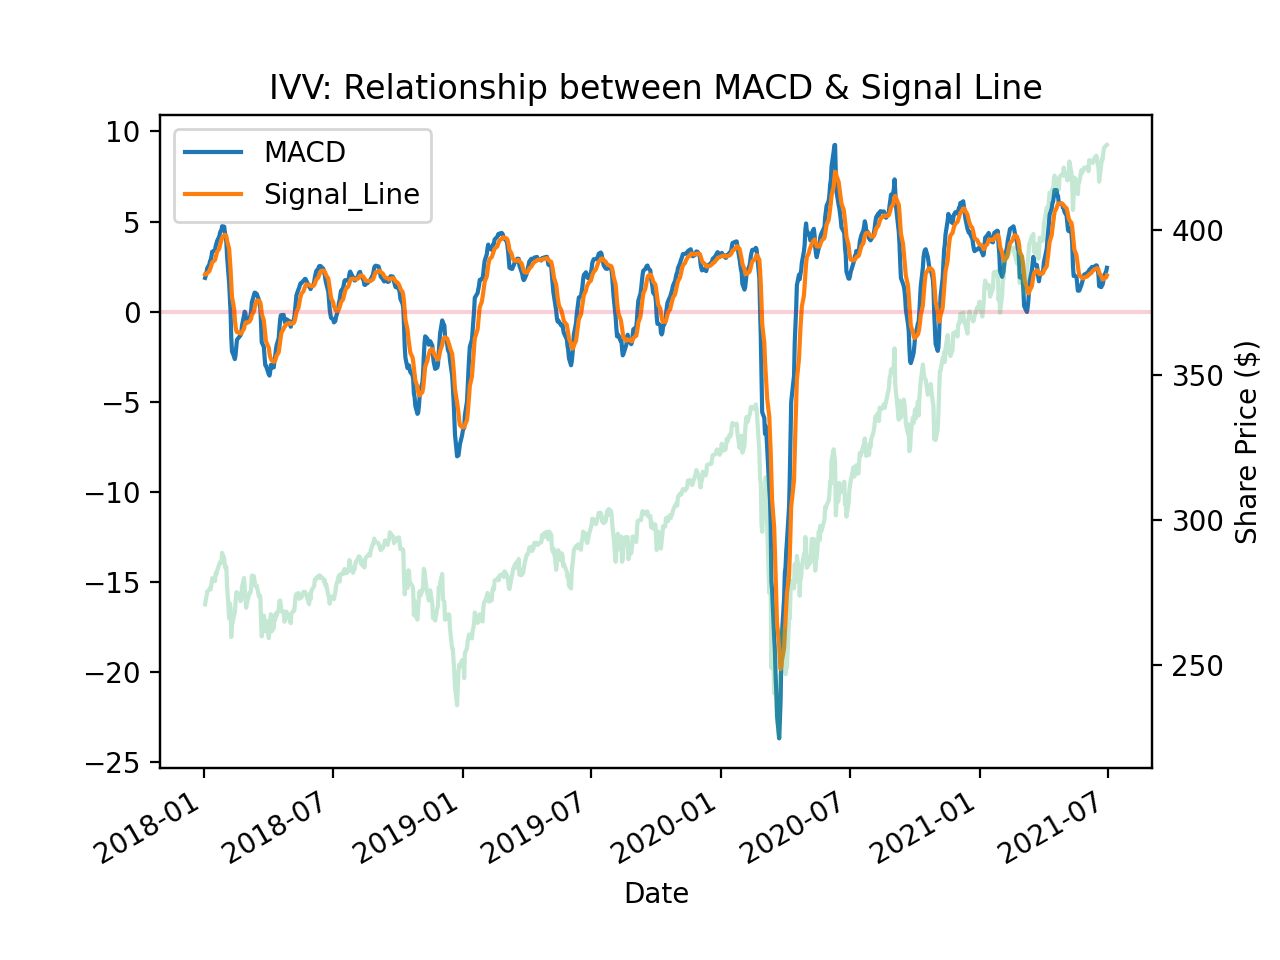

In [26]:
fig, ax = plt.subplots()
IVV_df[["MACD", "Signal_Line"]].loc["2018-01-01" :].plot(ax=ax)
IVV_df["Close"].loc["2018-01-01" : ].plot(ax=ax, alpha = 0.30, secondary_y=True, color= "mediumseagreen")
plt.title("IVV: Relationship between MACD & Signal Line")
ax.right_ax.set_ylabel("Share Price ($)")
ax.axhline(0, c="crimson", alpha = 0.20)
plt.show()

# save figure

# plt.savefig("IVV_MACD_Signal.png")

### Stochastic Oscillator 



#### Lagging Indictator

##### 14-high: Max of last 14 trading days /// 14-low: Min. of last 14 trading days
##### %K: (Last close -14 day low)*100 / (14 high - 14 low)
##### %D: Simple Moving Average of %K

##### IVV Stochastic Oscillator 

In [27]:
# IVV work

# get 14 day high
high14 = IVV_df["High"].rolling(14).max()

# get 14 day low 
low14 = IVV_df["Low"].rolling(14).min()

# Creating the %K column
IVV_df["%K"] = (IVV_df["Close"]- low14)*100/ (high14-low14)

# Creating the %D column
IVV_df["%D"] = IVV_df["%K"].rolling(3).mean()

In [28]:
# check the two new columns in the IVV_df

IVV_df.tail(4)

,High,Low,Open,Close,Volume,Adj Close,Daily_Change,Percent_Change,Normalized_Change,MA_10,EMA_10,MACD,Signal_Line,%K,%D
Date,,,,,,,,,,,,,,,
2021-06-24,427.380005,426.440002,426.690002,426.869995,4817200.0,426.869995,0.179993,0.042183,2.064867,423.581998,423.673244,1.709156,1.786904,95.321009,88.538997
2021-06-25,428.910004,427.399994,427.760010,428.440002,4171500.0,428.440002,0.679993,0.158966,2.072462,423.951999,424.539927,1.980129,1.825549,96.218813,91.788820
2021-06-28,429.489990,427.720001,429.040009,429.350006,4014100.0,429.350006,0.309998,0.072254,2.076864,424.310999,425.414487,2.242457,1.908930,98.924025,96.821282
2021-06-29,430.379211,429.000000,429.760010,429.480011,2863712.0,429.480011,-0.279999,-0.065152,2.077492,424.766000,426.153673,2.432801,2.013705,93.530560,96.224466


#### QQQ Stochastic Oscillator work 

In [29]:
# get the 14 day rolling maxes
high14 = QQQ_df["High"].rolling(14).max()

# get the 14 day rolling mins
low14 = QQQ_df["Low"].rolling(14).min()

# create the %k column
QQQ_df["%K"] = (QQQ_df["Close"] - low14)*100 / (high14-low14)

# create the %D column
QQQ_df["%D"] = QQQ_df["%K"].rolling(3).mean()

In [30]:
# check on the QQQ_df w/ the new columns
QQQ_df.tail(4)

,High,Low,Open,Close,Volume,Adj Close,Daily_Change,Percent_Change,Normalized_Change,MA_10,EMA_10,MACD,Signal_Line,%K,%D
Date,,,,,,,,,,,,,,,
2021-06-24,351.459991,349.170013,349.730011,349.890015,32581600.0,349.890015,0.160004,0.045751,3.398970,344.655002,344.600059,4.359291,3.488940,90.829572,93.871964
2021-06-25,350.720001,348.839996,350.470001,349.459991,28627400.0,349.459991,-1.010010,-0.288187,3.394793,345.477002,345.483683,4.493562,3.689864,87.827140,90.590701
2021-06-28,353.850006,350.720001,350.779999,353.709991,38934900.0,353.709991,2.929993,0.835279,3.436079,346.397000,346.979376,4.886583,3.929208,99.185962,92.614225
2021-06-29,354.950012,352.670013,353.529999,354.829987,25478610.0,354.829987,1.299988,0.367716,3.446959,347.653998,348.406759,5.228162,4.188999,99.341242,95.451448


### Graphing the Stochastic Oscillator for both ETFs

##### IVV Graph 

<IPython.core.display.Javascript object>


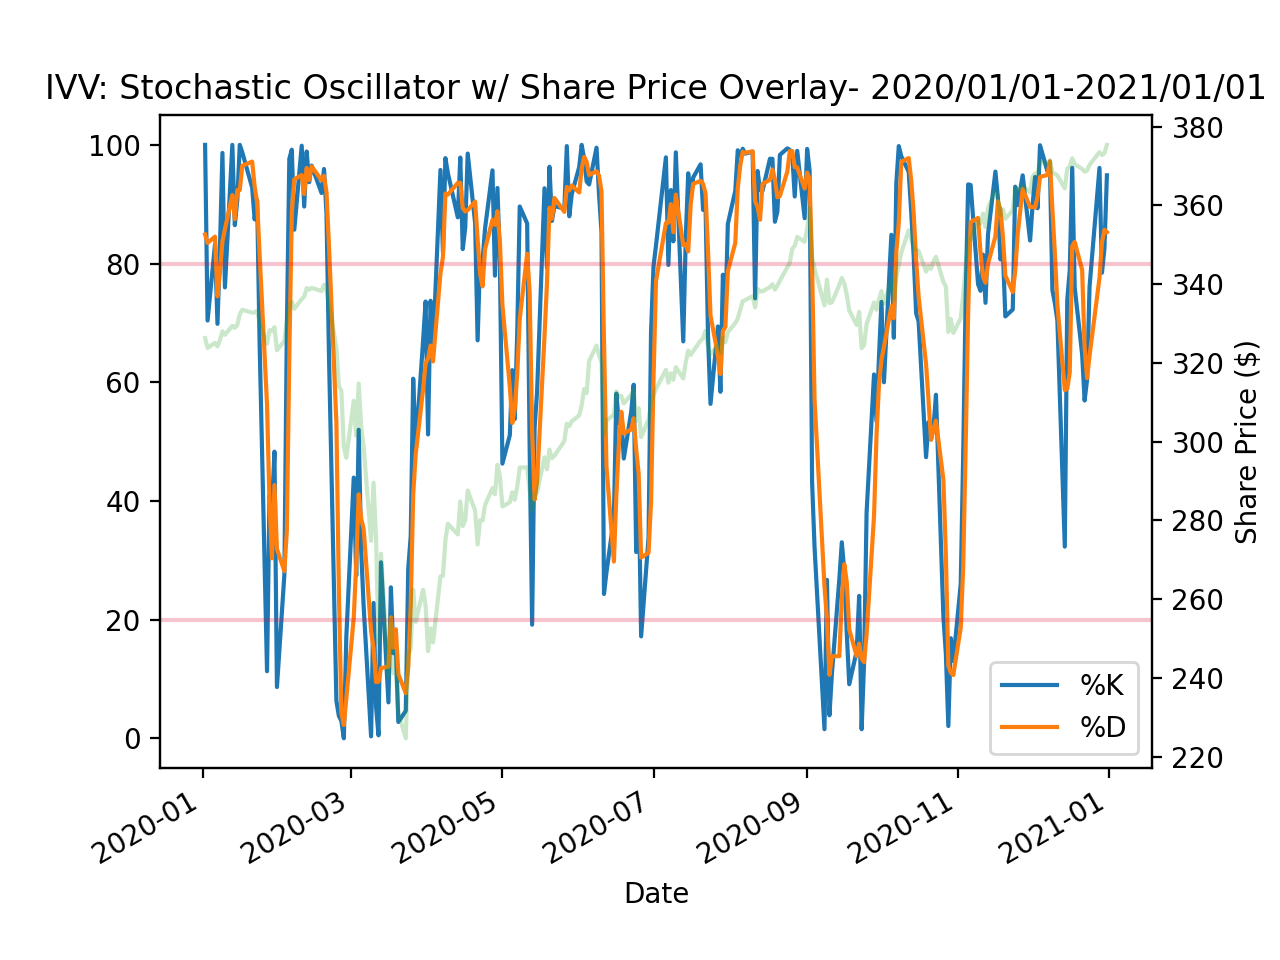

In [31]:
# so much volatility, so I made the range 2020-01-01 -> 2021-01-01 

fig, ax = plt.subplots()
IVV_df[["%K", "%D"]].loc["2020-01-01":"2021-01-01"].plot(ax=ax)
ax.axhline(80, c="crimson", alpha=0.25)
ax.axhline(20, c="crimson", alpha=0.25)
IVV_df["Close"].loc["2020-01-01":"2021-01-01"].plot(ax=ax, alpha = 0.25, secondary_y=True)
ax.right_ax.set_ylabel("Share Price ($)")
plt.title("IVV: Stochastic Oscillator w/ Share Price Overlay- 2020/01/01-2021/01/01")
plt.show()

# save figure
# plt.savefig("IVV_Stoch.png")

##### QQQ Stochastic Oscillator work 

<IPython.core.display.Javascript object>


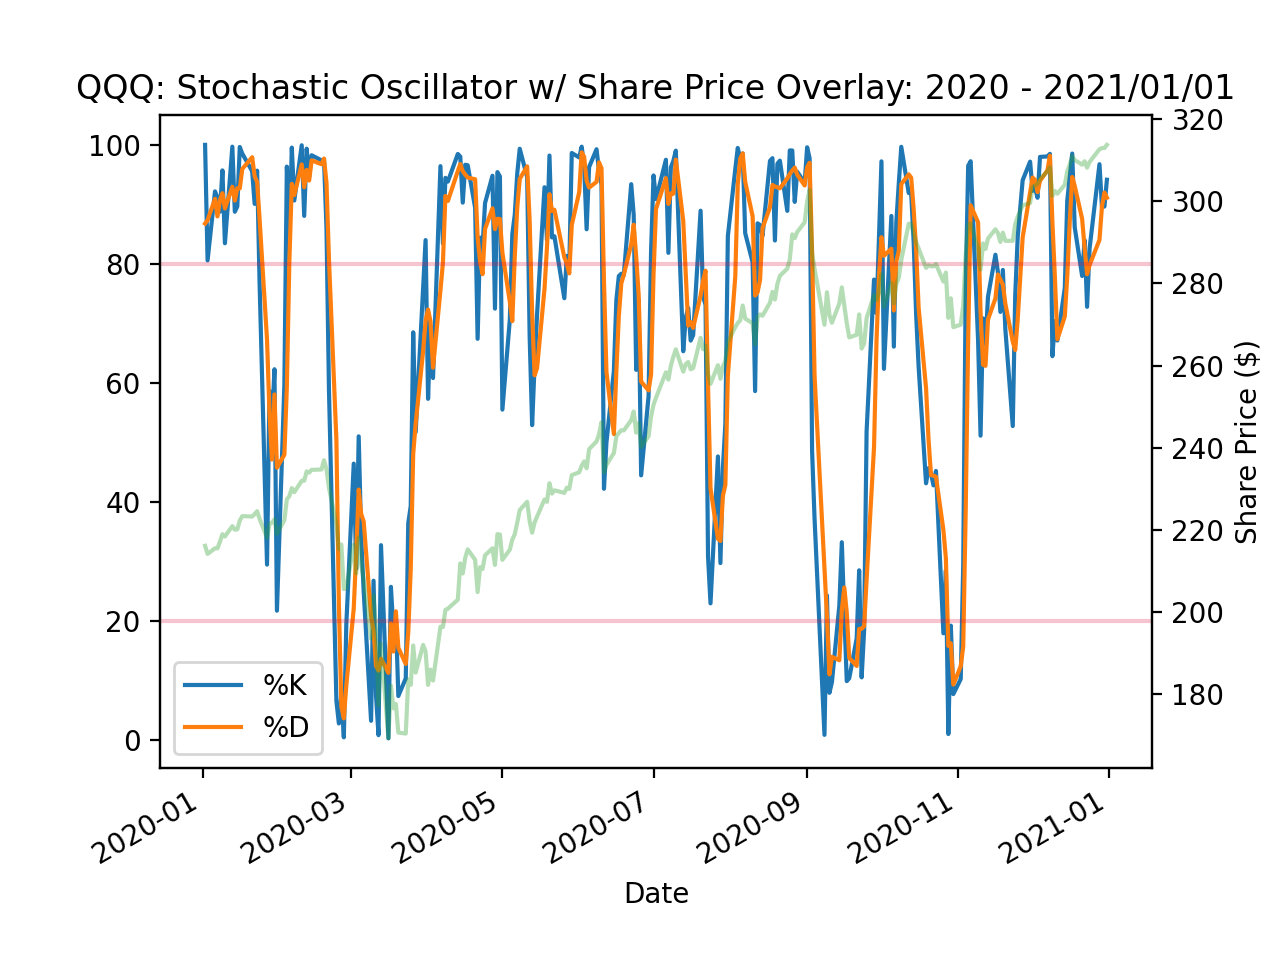

In [32]:
# QQQ

fig,ax = plt.subplots()
QQQ_df[["%K", "%D"]].loc["2020-01-01" : "2021-01-01"].plot(ax=ax)
ax.axhline(80, c= "crimson", alpha=0.25)
ax.axhline(20, c= "crimson", alpha=0.25)
QQQ_df["Close"].loc["2020-01-01" : "2021-01-01"].plot(ax=ax, secondary_y=True, alpha =0.35)
plt.title("QQQ: Stochastic Oscillator w/ Share Price Overlay: 2020 - 2021/01/01")
ax.right_ax.set_ylabel("Share Price ($)")
plt.show()

# save figure
# plt.savefig("QQQ_Stochastic_Osc.png")

#### Creating dataframes for the 1-year changes for both VOO & IVV

In [33]:
# Creating the DF

df_oneyear = df_comp
df_oneyear.head(5)

,Date,QQQ Adj Close,IVV Adj Close
0,2015-01-02,97.436562,182.605850
1,2015-01-05,96.007301,179.399445
2,2015-01-06,94.720009,177.783066
3,2015-01-07,95.941048,179.982437
4,2015-01-08,97.777336,183.197662


In [34]:
# add a column for 1 year difference from starting date
df_oneyear["Date + 1 year"] = df_oneyear["Date"] + pd.DateOffset(years=1)
df_oneyear = df_oneyear.rename(columns={"QQQ Adj Close" : "QQQ_1", "IVV Adj Close" : "IVV_1"})
df_oneyear.head(5)

,Date,QQQ_1,IVV_1,Date + 1 year
0,2015-01-02,97.436562,182.605850,2016-01-02
1,2015-01-05,96.007301,179.399445,2016-01-05
2,2015-01-06,94.720009,177.783066,2016-01-06
3,2015-01-07,95.941048,179.982437,2016-01-07
4,2015-01-08,97.777336,183.197662,2016-01-08


##### add the QQQ & IVV 1 year dates to a new dataframe 

In [35]:
df_one_year = pd.DataFrame(df_oneyear, columns = ["Date", "QQQ_1", "IVV_1"])
df_one_year.columns = ["Date + 1 year", "QQQ_2", "IVV_2"]

# use a left join to get the share prices for the 1 year later date
df_one_year_return = pd.merge(df_oneyear, df_one_year, on= "Date + 1 year", how="left").dropna()
df_one_year_return.head(5)

,Date,QQQ_1,IVV_1,Date + 1 year,QQQ_2,IVV_2
1,2015-01-05,96.007301,179.399445,2016-01-05,104.513603,182.862411
2,2015-01-06,94.720009,177.783066,2016-01-06,103.509689,180.468475
3,2015-01-07,95.941048,179.982437,2016-01-07,100.268433,176.150314
4,2015-01-08,97.777336,183.197662,2016-01-08,99.446175,174.199005
6,2015-01-12,96.120888,180.273941,2016-01-12,100.909035,175.725693


##### IVV 1 year DataFrame

In [36]:
IVV_one_year = df_one_year_return[["Date", "IVV_1", "Date + 1 year", "IVV_2"]]
IVV_one_year.head(5)

,Date,IVV_1,Date + 1 year,IVV_2
1,2015-01-05,179.399445,2016-01-05,182.862411
2,2015-01-06,177.783066,2016-01-06,180.468475
3,2015-01-07,179.982437,2016-01-07,176.150314
4,2015-01-08,183.197662,2016-01-08,174.199005
6,2015-01-12,180.273941,2016-01-12,175.725693


##### adding a column for the share price change in $

In [37]:

IVV_one_year["$ Change"] = IVV_one_year["IVV_2"] - IVV_one_year["IVV_1"]
IVV_one_year.tail(5)

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,IVV_1,Date + 1 year,IVV_2,$ Change
1376,2020-06-22,307.238525,2021-06-22,424.660004,117.421478
1377,2020-06-23,308.489410,2021-06-23,424.410004,115.920593
1378,2020-06-24,300.698608,2021-06-24,426.869995,126.171387
1379,2020-06-25,303.850403,2021-06-25,428.440002,124.589600
1381,2020-06-29,301.053192,2021-06-29,429.480011,128.426819


In [39]:
# Create a new DF for IVV that has the Date as the Index

IVV_date_year = IVV_one_year.set_index("Date")


<IPython.core.display.Javascript object>


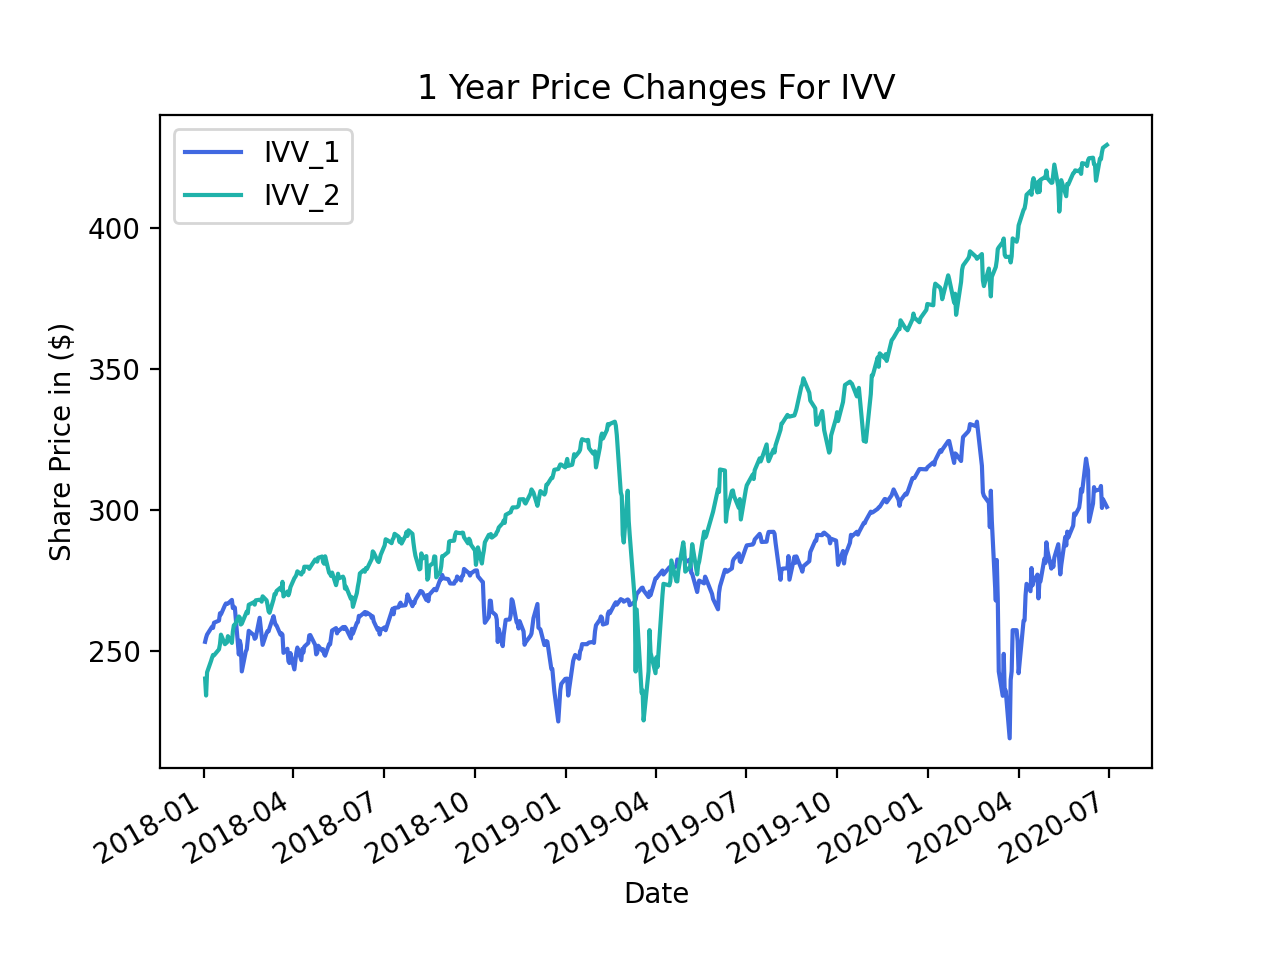

In [40]:
# Graph the 1 year share price change for IVV 
fig, ax = plt.subplots()
IVV_date_year["IVV_1"].loc["2018-01-01":].plot(ax=ax, c= "royalblue")
IVV_date_year["IVV_2"].loc["2018-01-01":].plot(ax=ax, c="lightseagreen")
plt.title("1 Year Price Changes For IVV")
plt.ylabel("Share Price in ($)")
plt.xlabel("Date")
plt.legend()
plt.show()

##### QQQ 1 Year Data 

In [41]:
QQQ_one_year = df_one_year_return[["Date", "QQQ_1", "Date + 1 year", "QQQ_2"]]

In [42]:
QQQ_one_year["$ Change"] = QQQ_one_year["QQQ_2"] - QQQ_one_year["QQQ_1"]
QQQ_one_year.tail(5)

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,QQQ_1,Date + 1 year,QQQ_2,$ Change
1376,2020-06-22,245.697891,2021-06-22,347.570007,101.872116
1377,2020-06-23,247.789017,2021-06-23,347.739990,99.950974
1378,2020-06-24,242.680679,2021-06-24,349.890015,107.209335
1379,2020-06-25,244.990875,2021-06-25,349.459991,104.469116
1381,2020-06-29,241.814346,2021-06-29,354.829987,113.015640


In [44]:
# Create a new DF for the 1 year that sets the index as the Date

QQQ_date_year = QQQ_one_year.set_index("Date")

<IPython.core.display.Javascript object>


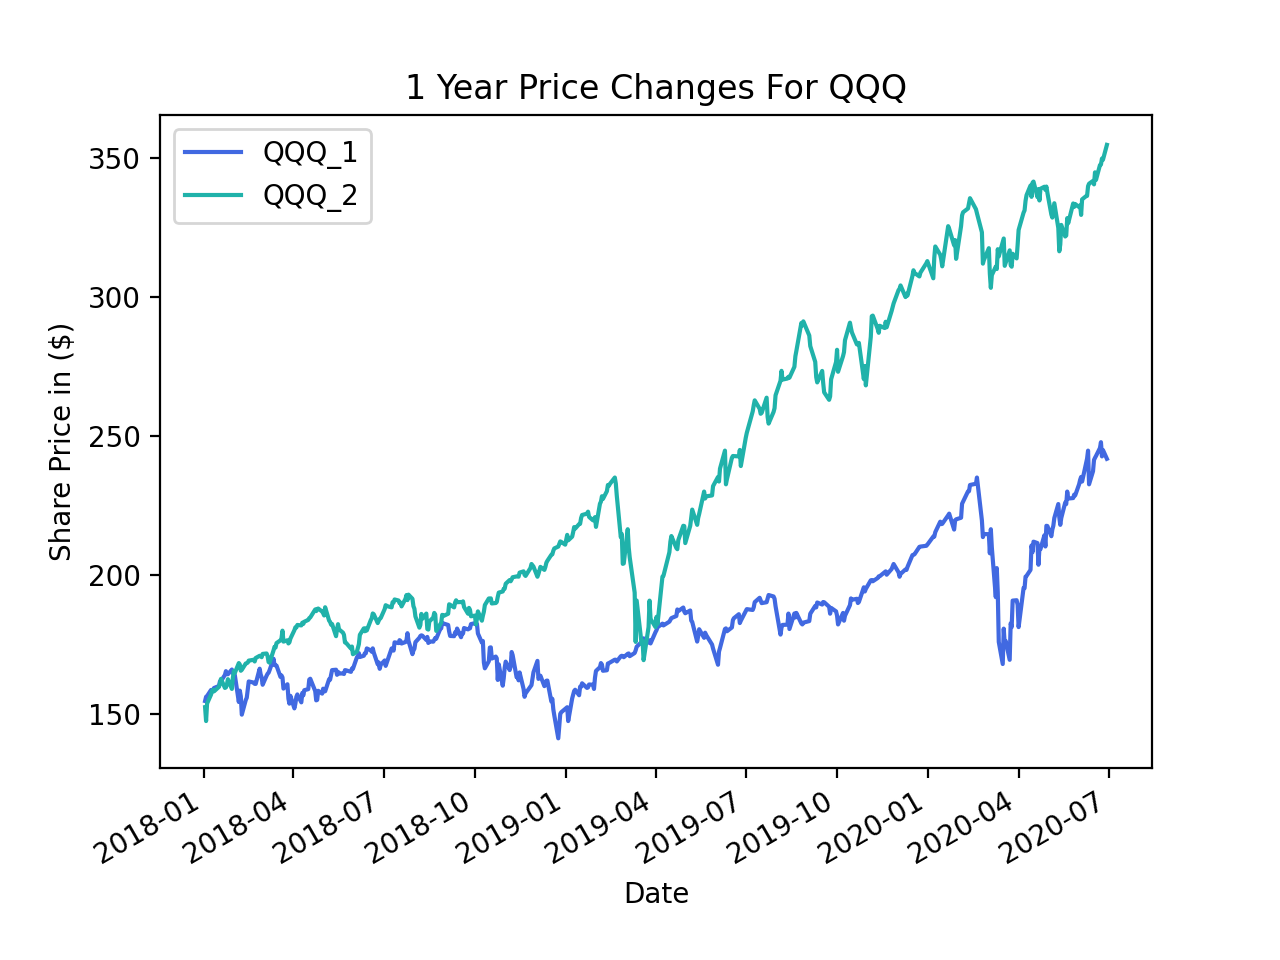

In [45]:
# Graph the share price change for 1 year w/ the QQQ data

fig, ax = plt.subplots()
QQQ_date_year["QQQ_1"].loc["2018-01-01":].plot(ax=ax, c= "royalblue")
QQQ_date_year["QQQ_2"].loc["2018-01-01":].plot(ax=ax, c="lightseagreen")
plt.title("1 Year Price Changes For QQQ")
plt.ylabel("Share Price in ($)")
plt.xlabel("Date")
plt.legend()
plt.show()

#### DF 1 year comparisions continued (adding new columns)

In [46]:
# DF 1 year comparisions continued 

df_one_year_return.head(5)

,Date,QQQ_1,IVV_1,Date + 1 year,QQQ_2,IVV_2
1,2015-01-05,96.007301,179.399445,2016-01-05,104.513603,182.862411
2,2015-01-06,94.720009,177.783066,2016-01-06,103.509689,180.468475
3,2015-01-07,95.941048,179.982437,2016-01-07,100.268433,176.150314
4,2015-01-08,97.777336,183.197662,2016-01-08,99.446175,174.199005
6,2015-01-12,96.120888,180.273941,2016-01-12,100.909035,175.725693


In [51]:
# Calculate the percentage change of 1 year share prices for each ETF

df_one_year_return["QQQ 1-yr % Change"] = (df_one_year_return["QQQ_2"]/ df_one_year_return["QQQ_1"])*100

df_one_year_return["IVV 1-yr % Change"] = (df_one_year_return["IVV_2"]/ df_one_year_return["IVV_1"])*100


# Denote which ETF performed better 
df_one_year_return["Performed Better"] = np.where(df_one_year_return["QQQ 1-yr % Change"]> 
                                                  df_one_year_return["IVV 1-yr % Change"], "QQQ",
                                                 np.where(df_one_year_return["QQQ 1-yr % Change"]== 
                                                          df_one_year_return["IVV 1-yr % Change"], "Equal", "IVV"))


df_one_year_return.sample(n=10)
                                                                      

,Date,QQQ_1,IVV_1,Date + 1 year,QQQ_2,IVV_2,QQQ 1-yr % Change,IVV 1-yr % Change,Performed Better
688,2017-09-26,139.382782,233.321274,2018-09-26,180.772507,276.723877,129.695005,118.602077,QQQ
837,2018-05-01,159.063080,250.579102,2019-05-01,186.212585,281.423767,117.068389,112.309353,QQQ
495,2016-12-19,116.099525,208.141815,2017-12-19,153.849487,251.603607,132.515173,120.880856,QQQ
1079,2019-04-17,184.458206,279.096161,2020-04-17,214.008545,282.076019,116.020073,101.067682,QQQ
442,2016-10-04,114.099266,197.002609,2017-10-04,142.167114,237.182800,124.599499,120.395766,QQQ
1266,2020-01-14,218.304825,320.615997,2021-01-14,313.589722,377.468109,143.647637,117.732151,QQQ
211,2015-11-03,109.628662,190.367493,2016-11-03,109.935127,191.601761,100.279548,100.648361,IVV
537,2017-02-21,126.115280,218.297775,2018-02-21,160.795639,254.286682,127.498935,116.486154,QQQ
1340,2020-04-30,217.607010,285.587524,2021-04-30,337.598389,417.667572,155.141321,146.248535,QQQ
83,2015-05-04,103.628052,188.863724,2016-05-04,100.738457,186.159760,97.211571,98.568299,IVV


In [56]:
# Count the number of dates that each ETF performed better than it's competitor 

etf_greater_count = df_one_year_return["Performed Better"].value_counts()
df_len_1yr = len(df_one_year_return)
# times both ETFs performed at the same rate
equal_counts_1yr = df_len_1yr-sum(etf_greater_count)
equal_counts_1yr

0

In [57]:
etf_greater_count

QQQ    855
IVV    135
Name: Performed Better, dtype: int64

In [96]:
# make the list into a DF
etf_1year_list = [855,135,0]
etf_greater_count1 = {"Performed Better" : [855,135,0]}
etf_greater_count_df = pd.DataFrame(etf_greater_count1, index = ["QQQ", "IVV", "Equal"])
etf_greater_count_df

,Performed Better
QQQ,855
IVV,135
Equal,0


In [101]:
etf_1year_list

[855, 135, 0]

##### Create a Bar Graph to visualize the count of each ETFs "Better Performances"

<IPython.core.display.Javascript object>


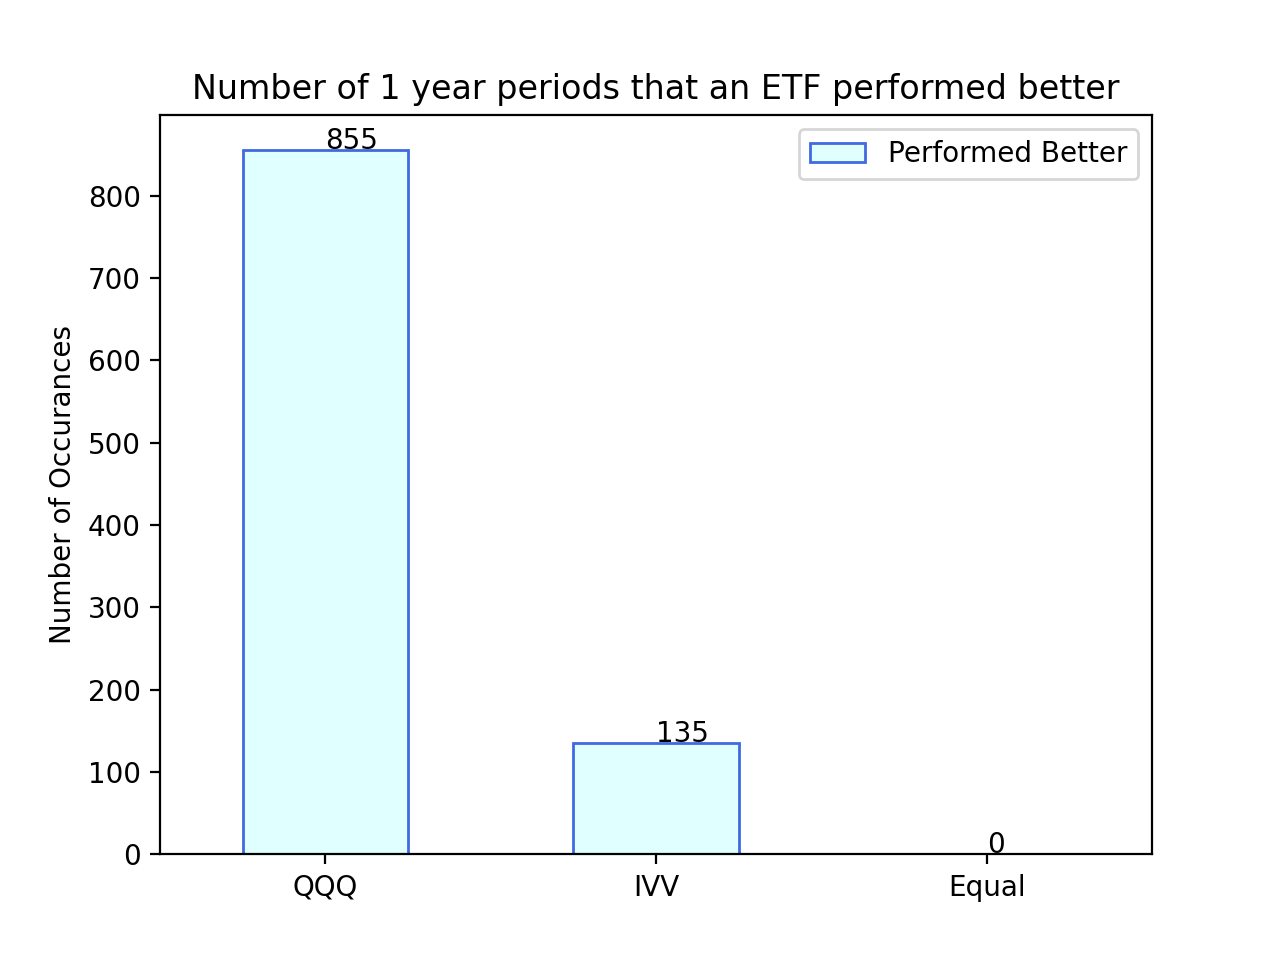

In [123]:


bar_plot_1 = etf_greater_count_df.plot.bar(rot=0, color ="lightcyan", edgecolor="royalblue")
plt.xlabel("")
plt.ylabel("Number of Occurances")
plt.title("Number of 1 year periods that an ETF performed better")
for index,data in enumerate(etf_1year_list):
    plt.text(x=index, y =data+2, s=f"{data}", fontdict=dict(fontsize=10))
    
# save figure
# plt.savefig("Bar_Chart_1yr_comp.png")

#### 5 year percent changes for both ETFs

In [71]:
# Create a new Df for the 5 year changes
df_5_year = df_comp
df_5_year = df_5_year.drop(columns=["Date + 1 year"])
df_5_year["Date + 5 Years"] = df_5_year["Date"] + pd.DateOffset(years=5)
df_5_year = df_5_year.rename(columns = {"QQQ Adj Close" : "QQQ_1", "IVV Adj Close": "IVV_1"})
df_5_year.head(5)

,Date,QQQ_1,IVV_1,Date + 5 Years
0,2015-01-02,97.436562,182.605850,2020-01-02
1,2015-01-05,96.007301,179.399445,2020-01-05
2,2015-01-06,94.720009,177.783066,2020-01-06
3,2015-01-07,95.941048,179.982437,2020-01-07
4,2015-01-08,97.777336,183.197662,2020-01-08


In [72]:
# join w/ the ADJ Closes of Both ETFs for their 5 year dates

df_join_5yr = pd.DataFrame(df_5_year, columns = ["Date", "QQQ_1", "IVV_1"])
df_join_5yr.columns = ["Date + 5 Years", "QQQ_2", "IVV_2"]

df_five_year_return = pd.merge(df_5_year, df_join_5yr, on="Date + 5 Years", how="left").dropna()
df_five_year_return.head(5)


,Date,QQQ_1,IVV_1,Date + 5 Years,QQQ_2,IVV_2
0,2015-01-02,97.436562,182.605850,2020-01-02,214.416458,318.081604
2,2015-01-06,94.720009,177.783066,2020-01-06,213.821289,316.882660
3,2015-01-07,95.941048,179.982437,2020-01-07,213.791519,316.015167
4,2015-01-08,97.777336,183.197662,2020-01-08,215.398438,317.623474
5,2015-01-09,97.133690,181.651855,2020-01-09,217.223633,319.767944


#### Calculate the percentage change of 5 year share prices for each ETF

In [73]:
# Calculate the percentage change of 5 year share prices for each ETF

df_five_year_return["QQQ 5-yr % Change"] = (df_five_year_return["QQQ_2"]/ df_five_year_return["QQQ_1"])*100

df_five_year_return["IVV 5-yr % Change"] = (df_five_year_return["IVV_2"]/ df_five_year_return["IVV_1"])*100


# Denote which ETF performed better 
df_five_year_return["Performed Better"] = np.where(df_five_year_return["QQQ 5-yr % Change"]> df_five_year_return["IVV 5-yr % Change"], "QQQ",
                                                 np.where(df_five_year_return["QQQ 5-yr % Change"]== df_five_year_return["IVV 5-yr % Change"], "Equal", "IVV"))


df_five_year_return.sample(n=10)

,Date,QQQ_1,IVV_1,Date + 5 Years,QQQ_2,IVV_2,QQQ 5-yr % Change,IVV 5-yr % Change,Performed Better
229,2015-11-30,108.684982,188.339340,2020-11-30,298.354523,359.470062,274.513108,190.862972,QQQ
91,2015-05-14,103.960129,189.653580,2020-05-14,220.509628,280.447784,212.109807,147.873710,QQQ
361,2016-06-09,105.667511,192.600845,2021-06-09,336.449707,421.994995,318.404119,219.103397,QQQ
248,2015-12-28,107.592300,186.231995,2020-12-28,311.923767,371.197479,289.912722,199.319929,QQQ
247,2015-12-24,107.649673,186.674271,2020-12-24,308.811310,367.997620,286.866927,197.133552,QQQ
253,2016-01-05,104.513603,182.862411,2021-01-05,311.105743,370.342896,297.670096,202.525436,QQQ
337,2016-05-05,100.709679,186.105515,2021-05-05,328.648773,416.082184,326.332859,223.573270,QQQ
278,2016-02-10,92.447334,168.164398,2021-02-10,331.945190,389.114899,359.064102,231.389582,QQQ
271,2016-02-01,99.828598,175.797989,2021-02-01,321.640198,375.242096,322.192442,213.450733,QQQ
86,2015-05-07,101.844490,186.636002,2020-05-07,220.499710,283.105927,216.506273,151.688808,QQQ


In [78]:
# Count the number of dates that each ETF performed better than it's competitor 

etf_greater_count5 = df_five_year_return["Performed Better"].value_counts()
df_len_5yr = len(df_five_year_return)
# times that both ETFs performed at the same rate (equal counts)
equal_counts5yr = df_len_5yr -sum(etf_greater_count5)
equal_counts5yr

print("Days in which both ETFs performed at the same rate during the 5 yr period: ", equal_counts5yr )

Days in which both ETFs performed at the same rate during the 5 yr period:  0


In [84]:

print("QQQ outperformed IVV ", sum(etf_greater_count5), "times in the 5 year period.  IVV didn't outperform QQQ *once*.")

QQQ outperformed IVV  349 times in the 5 year period.  IVV didn't outperform QQQ *ONCE*.


In [91]:
etf_day_count5 = {"Performed Better" : [349,0,0]}
etf_greater_df5 = pd.DataFrame(etf_day_count5, index=["QQQ", "IVV", "Equal"])
etf_greater_df5

,Performed Better
QQQ,349
IVV,0
Equal,0


In [118]:
# make a list of the outcomes for the labels below in the graph
fiveyear_list = [349,0,0]

##### Bar Chart to visualize the number of times each ETF outperformed the other (5 years)

<IPython.core.display.Javascript object>


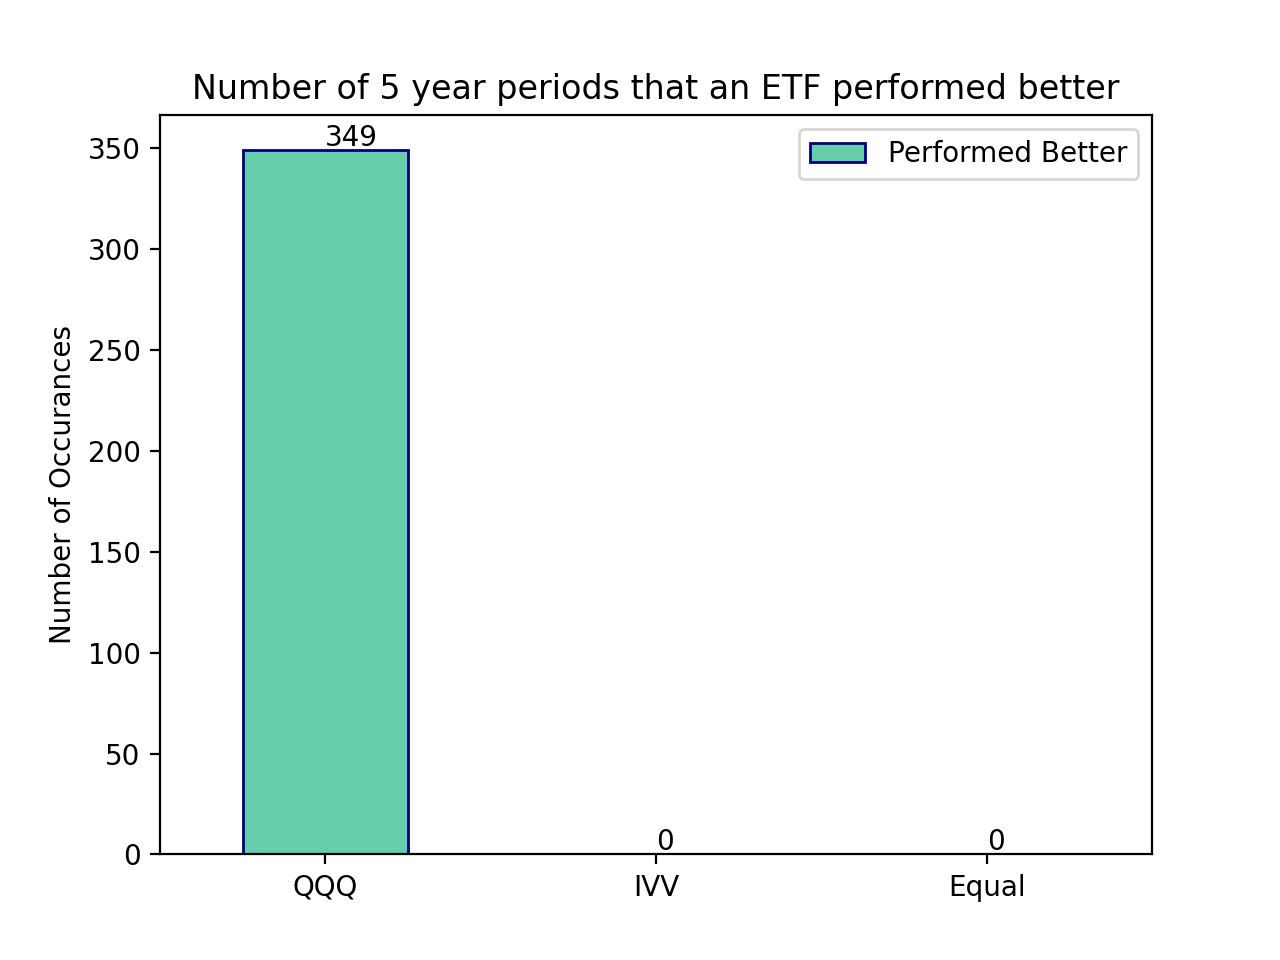

In [120]:
# 5 year bar chart of comparative performance 

bar_plot_5 = etf_greater_df5.plot.bar(rot=0, color = "mediumaquamarine", edgecolor = "navy")
plt.xlabel("")
plt.ylabel("Number of Occurances")
plt.title("Number of 5 year periods that an ETF performed better")
for index,data in enumerate(fiveyear_list):
    plt.text(x=index, y = data+2, s=f"{data}", fontdict=dict(fontsize=10))



# save figure
# plt.savefig("Bar_Chart_5yr_comp.png")

In [ ]:
# outline - dataframe that shows returns on $10,000 investment into each ETF
#    Columns - "Initial Investment", "1 yr return", "Greater ROI 1 year", " 3 yr return", "Geater ROI 3 year",
#              "5 yr return", "Greater ROI 5 year", "Return to date" "Greater ROI to date", 
#.             "Total difference in $", "total percentage ROI"

#.   index = ["QQQ", "ETF"]
 
# ***** MIGHT BE USEFUL TO INCLUDE PUTTING $10K INTO JUST THE S&P 500 AS A CONTROL / COMPARASION ****

# Then export to excel and use conditional formating to show which ETF gained more each time, although 
# looking at the data it seems like QQQ will sweep every return period.

# Then make a line plot showing the returns over time. 
# Finally, maybe a stacked bar plot w/ initial investment below final investment

# 1 more....need to make sure to get expense ratios of each and put that into some sort of DF

#### Expense Ratios | 

In [ ]:
# According to the mutual fund research firm Morningstar, mutual funds and 
# exchange-traded funds had an average expense ratio of 0.45% in 2019.


# Expense ratios

# QQQ -> 0.200
# IVV -> 0.030

In [124]:
# Opening Share Prices

# IVV- $ 207.83- 01/02/2015 
# QQQ- $ 103.76- 01/02/2015 

# $10,000 in each nets: 

# IVV
IVV_start = 10000/207.83
print("IVV starting share count is: ", IVV_start)
# 48.17 shares

# QQQ
QQQ_start = 10000/103.76
print("QQQ starting share count is: ", QQQ_start)
# 96.38 shares

IVV starting share count is:  48.116248857239086
QQQ starting share count is:  96.37625289128758


### Creating a dataframe to compare returns 

In [136]:
# Look at the QQQ_df and the IVV_df to get the share prices for the dates (1 year, 3 years, 5 years, current)

QQQ_returns = [109.50, 158.49, 216.16, 354.82]
QQQ_normalized = [1.063, 1.539, 2.099, 3.466]

# 1 year QQQ
QQQ_df.loc["2016-01-01": "2016-01-04"]
print("The one year QQQ share price is $109.50, normalized change of 1.063 %")

The one year QQQ share price is $109.50, normalized change of 1.063%


In [139]:
# 3 year QQQ
QQQ_df.loc["2018-01-01" : "2018-01-04"]
print("The three year QQQ share price is $158.49, normalized change of 1.539 %")

The three year QQQ share price is $158.49, normalized change of $1.539%


In [141]:
# 5 year QQQ
QQQ_df.loc["2020-01-01" : "2020-01-04"]
print("The five year QQQ share price is $216.16, normalized change of 2.099 %")

The five year QQQ share price is $216.16, normalized change of 2.099 %


In [8]:
# Current QQQ
# 354.82
# QQQ_df.loc["2021-06-28" : "2021-06-29"]
print("The CURRENT QQQ share price (6/29/21) is $354.82, normalized change of 3.446 %")

The CURRENT QQQ share price (6/29/21) is $354.82, normalized change of 3.446 %


In [146]:
# 1 year IVV
IVV_df.loc["2016-01-01": "2016-01-04"]
print("The one year IVV share price is $202.00, normalized change of 0.977 %")

The one year IVV share price is $202.00, normalized change of 0.977 %


In [147]:
# 3 year IVV

IVV_df.loc["2018-01-01": "2018-01-04"]
print("The three year IVV share price is $270.85, normalized change of 1.310 %")

The three year IVV share price is $270.85, normalized change of 1.310 %


In [149]:
# 5 year IVV

IVV_df.loc["2020-01-01" : "2020-01-04"]
print("The five year IVV share price is $318.08, normalized change of 1.578 %")

The five year IVV share price is $318.081, normalized change of 1.578 %


In [9]:
# Current IVV

# yahoo API isn't working, went back up to DF to find it manually. Will double back and [-1] it to keep current
# IVV_df.iloc["2021-6-28":"2021-6-29"]
print("The CURRENT IVV share price (6/29/21) is 429.48, normalized change of 2.077 %")

The CURRENT IVV share price (6/29/21) is 429.48, normalized change of 2.077 %


#### DATAFRAME of comparative ROI for both ETFs

In [10]:
# values
QQQ_prices = [109.50, 158.49, 216.16, 354.82]
QQQ_normalized = [1.063, 1.539, 2.099, 3.466]

IVV_prices = [202.00, 270.85, 318.08, 429.48]
IVV_normalized = [0.977, 1.310, 1.578, 2.077]



In [17]:
# Opening Share Prices

# IVV- $ 207.83- 01/02/2015 
# QQQ- $ 103.76- 01/02/2015 

# Gains in DOLLARS

QQQ1= 109.50-103.76 # $ 5.74
QQQ3= 158.49-103.76 # $ 54.73
QQQ5= 216.16-103.76 # $ 112.40
QQQC= 354.82-103.76 # $ 251.06
print("QQQ RETURNS: ", QQQ1, QQQ3, QQQ5, QQQC)

QQQ_dollars = [5.74, 54.73, 112.40, 251.06]

IVV1 = 202.00 - 207.83 # $ -5.83
IVV3 = 270.85 - 207.83 # $ 63.02
IVV5 = 318.08 - 207.83 # $ 110.25
IVVC = 429.48 - 207.83 # $ 221.65
print("IVV RETURNS: ", IVV1, IVV3, IVV5, IVVC)

IVV_dollars = [-5.83, 63.02, 110.25, 221.65]

QQQ RETURNS:  5.739999999999995 54.730000000000004 112.39999999999999 251.06
IVV RETURNS:  -5.8300000000000125 63.02000000000001 110.24999999999997 221.65


In [18]:
initial_inv = [10000, 10000]

In [20]:
# Creating the DF- columns
# Initial investment, price after 1 year, share price change in $, 1 year ROI... repreat for all 
returns_etf_dict = {"Initial Investment" : [10000, 10000], "Initial Share Price" : [103.76, 207.83],
              "Price after 1 year" : [109.50, 202.00], "1 year S.P. change ($)" : [5.74, -5.83],
              "1 year normalized change" : [1.063, 0.977], "1 year ROI" : [630, -330],
              "Price after 3 years" : [158.49, 270.85], "3 year S.P. change ($)" : [54.73, 63.02],
              "3 year normalized change" : [1.539, 1.310], "3 year ROI" : [5390, 3100],
              "Price after 5 years" : [216.16, 318.08], "5 year S.P. change ($)" : [112.40, 110.25],
                "5 year normalized change" : [2.099, 1.578], "5 year ROI" : [10990, 5780],
                   "Current Price" : [354.82, 429.48], "Current S.P. change ($)" : [251.06, 221.65],
                   "Current normalized change" : [3.466, 2.077], "Current ROI" : [24660,10770]}

df_returns_etf = pd.DataFrame(returns_etf_dict, index = ["QQQ", "IVV"])
df_returns_etf

,Initial Investment,Initial Share Price,Price after 1 year,1 year S.P. change ($),1 year normalized change,1 year ROI,Price after 3 years,3 year S.P. change ($),3 year normalized change,3 year ROI,Price after 5 years,5 year S.P. change ($),5 year normalized change,5 year ROI,Current Price,Current S.P. change ($),Current normalized change,Current ROI
QQQ,10000,103.76,109.5,5.74,1.063,630,158.49,54.73,1.539,5390,216.16,112.40,2.099,10990,354.82,251.06,3.466,24660
IVV,10000,207.83,202.0,-5.83,0.977,-330,270.85,63.02,1.310,3100,318.08,110.25,1.578,5780,429.48,221.65,2.077,10770


In [21]:
df_returns_etf.to_csv(r'etf_returns_table.csv',index=True, header=True)

In [23]:
holdings_df.to_csv(r'top_5_holdings.csv', index=True, header=True)